In [1]:
#importing necessary modules
from datetime import datetime as dt
import pandas as pd
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.plots as mpplots

from matplotlib.patheffects import withStroke
from metpy.io import parse_metar_file
from metpy.units import pandas_dataframe_to_unit_arrays
from metpy.cbook import get_test_data
from metpy.units import units

from scipy.stats import zscore
 
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Link to datafile: https://drive.google.com/file/d/1kjzuaNx7G6EmjFbIToN6DitoZnbmfy9V/view?usp=sharing
# Open the netCDF file as a xarray Dataset
dataX = xr.open_dataset('C:\\Users\\Dell\\Documents\\BD final proj\\projdata1.nc4', decode_times = False)

# View a summary of the Dataset
dataX

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 36, lon: 84, time: 1248)
Coordinates:
  * lat       (lat) float64 71.25 70.75 70.25 69.75 ... 55.25 54.75 54.25 53.75
  * lon       (lon) float64 -170.2 -169.8 -169.2 -168.8 ... -129.8 -129.2 -128.8
  * time      (time) int32 0 1 2 3 4 5 6 ... 1241 1242 1243 1244 1245 1246 1247
Dimensions without coordinates: bnds
Data variables:
    irrx      (time, lat, lon) float32 ...
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    petx      (time, lat, lon) float32 ...
    pptx      (time, lat, lon) float32 ...
    tmin      (time, lat, lon) float32 ...
    tmax      (time, lat, lon) float32 ...
    rhum      (time, lat, lon) float32 ...
    srad      (time, lat, lon) float32 ...
    vpxx      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        CGCM1 scenario. mean monthly irradiance from Canadian Clima...
    institution:  National Center for Atmospheric Research
    project:      Vegetation/Ecosystem Modeling and Analysis Project (VEMAP)
    contact:      P.O. Box 3000 Boulder, CO 80307-3000. Phone: (303) 497- 1000
    source:       CCCma-CGCM1 model

In [3]:
print(dataX.head,'\n\n\n\nOriginal Info:\n\n',dataX.info)

<bound method Dataset.head of <xarray.Dataset>
Dimensions:   (bnds: 2, lat: 36, lon: 84, time: 1248)
Coordinates:
  * lat       (lat) float64 71.25 70.75 70.25 69.75 ... 55.25 54.75 54.25 53.75
  * lon       (lon) float64 -170.2 -169.8 -169.2 -168.8 ... -129.8 -129.2 -128.8
  * time      (time) int32 0 1 2 3 4 5 6 ... 1241 1242 1243 1244 1245 1246 1247
Dimensions without coordinates: bnds
Data variables:
    irrx      (time, lat, lon) float32 ...
    lat_bnds  (lat, bnds) float64 71.5 71.0 71.0 70.5 ... 54.5 54.0 54.0 53.5
    lon_bnds  (lon, bnds) float64 -170.5 -170.0 -170.0 ... -129.0 -129.0 -128.5
    petx      (time, lat, lon) float32 ...
    pptx      (time, lat, lon) float32 ...
    tmin      (time, lat, lon) float32 ...
    tmax      (time, lat, lon) float32 ...
    rhum      (time, lat, lon) float32 ...
    srad      (time, lat, lon) float32 ...
    vpxx      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        CGCM1 scenario. mean monthly irradi

In [12]:
#Converting Data to Pandas
data1 = dataX.to_dataframe().reset_index()

In [13]:
#Renaming the column Headers
data = data1.rename(columns = {'lat':'Latitude', 'lon':'Longitude', 'irrx':'Irradiation','pptx':'Precipitation (mm/month)','tmin':'Min. Temp (C)','tmax':'Max Temp (C)','rhum':'Relative Humidity', 'petx': 'Potential Evapotranspiration','vpxx':'Vapor Pressure (Pa)', 'srad':'Solar Radiation', 'pptx':'Precipitation'})

In [14]:
#Removing the unneeded columns from data
data.drop(['Potential Evapotranspiration'], axis = 1, inplace = True)

In [15]:
#Dropping NaN values
data = data.dropna()

In [16]:
#Removing outliers from each columnn - if values are more than 2 std deviations from the mean, they will be removed
z = zscore(data)
abs_z = np.abs(z)
filtered_data = (abs_z < 2).all(axis=1)
dataA = data[filtered_data]

In [17]:
dataA

,bnds,Latitude,Longitude,time,Irradiation,lat_bnds,lon_bnds,Precipitation,Min. Temp (C),Max Temp (C),Relative Humidity,Solar Radiation,Vapor Pressure (Pa)
33696,0,71.25,-156.75,0,0.020690,71.5,-157.0,22.766439,-24.069483,-16.347624,62.089603,0.156222,106.458366
33698,0,71.25,-156.75,2,116.899345,71.5,-157.0,13.273505,-28.469589,-20.897623,58.534901,4834.741699,63.520851
33699,0,71.25,-156.75,3,245.867661,71.5,-157.0,5.970510,-27.356468,-11.623947,32.577370,14312.712891,62.337658
33700,0,71.25,-156.75,4,106.681755,71.5,-157.0,5.084956,-9.137223,-5.175585,58.283066,8741.326172,231.772751
33702,0,71.25,-156.75,6,240.364380,71.5,-157.0,20.119175,0.232107,6.417632,32.442295,20639.884766,270.883423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918907,1,56.75,-128.75,1243,359.867310,56.5,-128.5,111.105553,6.109402,21.305946,51.007301,19223.939453,951.011414
6918908,1,56.75,-128.75,1244,247.611404,56.5,-128.5,114.367096,3.237834,14.749005,60.369171,11189.504883,792.295959
6918909,1,56.75,-128.75,1245,169.319977,56.5,-128.5,81.266823,-2.290956,7.961297,62.780403,6107.671387,556.328796
6918910,1,56.75,-128.75,1246,84.514694,56.5,-128.5,35.471500,-12.314125,-1.793952,58.331322,2422.350342,265.040924


In [44]:
dataA['Avg. Temp (C)'] = (dataA['Min. Temp (C)']+dataA['Max Temp (C)'])/2

In [45]:
#Only keeping values for the first 20 years (240 months since Jan 1, 1997) of data and removing the future data
dataA = dataA[dataA['time'] < 240]  

In [46]:
dataA

,bnds,Latitude,Longitude,time,Irradiation,lat_bnds,lon_bnds,Precipitation,Min. Temp (C),Max Temp (C),Relative Humidity,Solar Radiation,Vapor Pressure (Pa),Avg. Temp (C)
33696,0,71.25,-156.75,0,0.020690,71.5,-157.0,22.766439,-24.069483,-16.347624,62.089603,0.156222,106.458366,-20.208553
34944,0,71.25,-156.25,0,0.020626,71.5,-156.5,22.678398,-24.005478,-16.463100,62.791420,0.155660,106.776276,-20.234289
131040,0,70.75,-159.75,0,0.061770,71.0,-160.0,4.563695,-26.715946,-16.447380,54.066063,0.584210,87.749496,-21.581663
132288,0,70.75,-159.25,0,0.038960,71.0,-159.5,5.672720,-26.539099,-16.575363,55.363136,0.378171,116.076370,-21.557232
133536,0,70.75,-158.75,0,0.059626,71.0,-159.0,7.901144,-26.372299,-16.765202,56.398975,0.588037,87.146019,-21.568750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846528,1,56.75,-157.25,0,64.265877,56.5,-157.0,168.847778,-11.094154,-0.623779,59.693420,1711.583862,312.986115,-5.858967
6913920,1,56.75,-130.25,0,59.310341,56.5,-130.0,258.350800,-13.096043,-9.394474,77.414177,1562.213745,232.849869,-11.245258
6915168,1,56.75,-129.75,0,51.280651,56.5,-129.5,114.772423,-13.178009,-9.875027,77.798416,1350.811279,230.004883,-11.526518
6916416,1,56.75,-129.25,0,56.591797,56.5,-129.0,102.120224,-15.245184,-11.232820,75.280121,1492.012329,196.410492,-13.239002


In [47]:
print('\nNumber of rows & columns, respectively:\n\n\tUnfiltered Data:',data1.shape, '\n\tFiltered Data:',dataA.shape,'\n\n\nNumber of Elements:\n\n\tUnfiltered Data:',data1.size,'\n\tFilteredData:',dataA.size,'\n')


Number of rows & columns, respectively:

	Unfiltered Data: (7547904, 14) 
	Filtered Data: (2058, 14) 


Number of Elements:

	Unfiltered Data: 105670656 
	FilteredData: 28812 



2058 		 2058


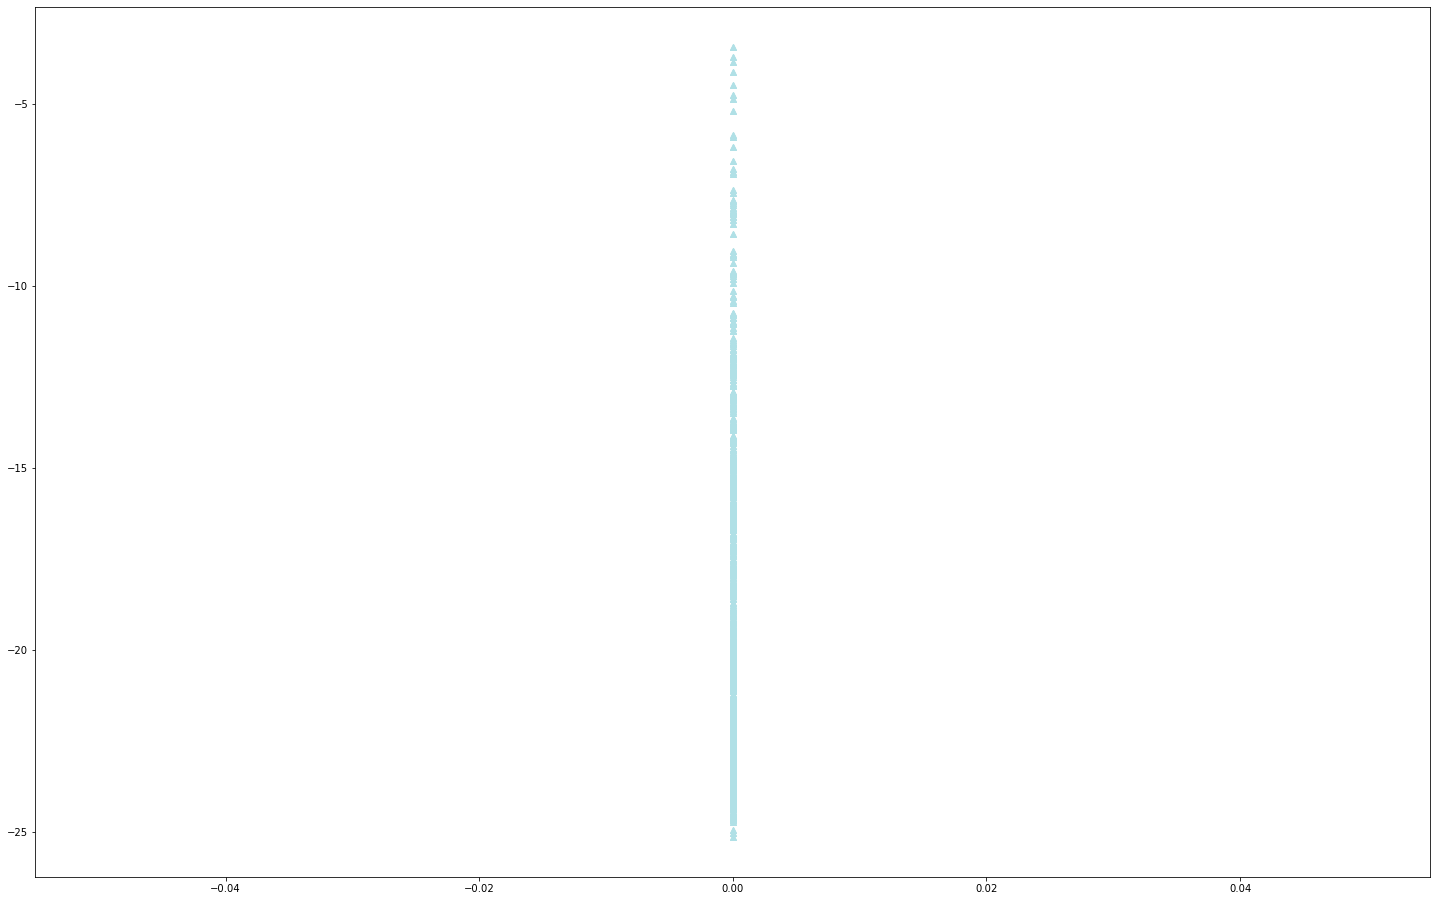

In [48]:
#y = dataA['Avg. Temp (C)']
#x = dataA['time']

avgtemp = dataA.loc[:, 'Avg. Temp (C)']
time = dataA.loc[:, 'time']
tempY = avgtemp.to_numpy()
timeX = time.to_numpy()

print(len(tempY),'\t\t',len(timeX))

tempY.transpose()
timeX.transpose()

plt.figure(figsize=(25,16))
plt.plot(timeX, tempY, color='powderblue', marker='^', linestyle= 'none', label='Original Data')

In [ ]:

#tempY = avgtemp.to_numpy()
#timeX = time.to_numpy()
print(avgtemp,'\n\n', time)
#Making the array 1D
#y = tempY[0,:]
#x = timeX[0,:]

In [ ]:
plt.plot(x, y, color='powderblue', marker='^', linestyle= 'none', label='Original Data')

In [ ]:
dataA.plot(x ='time', y='Avg. Temp (C)', kind = 'scatter')